In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
import matplotlib.dates as mdates

In [10]:
dfxgboost= pd.read_csv('xgboost_results_dump.csv')
dfarima = pd.read_csv('arima_results_dump.csv')
#print(dfarima.head())
#print(dfxgboost.head())

In [11]:
dfxgboost.rename(columns={'Unnamed: 0':'date'},inplace = True)
dfarima.rename(columns={'Unnamed: 0':'date'},inplace = True)
dfsor = pd.merge(dfxgboost, dfarima, on = 'date', suffixes = ('_xgboost','_arima'))
dfsor['date'] = pd.to_datetime(dfsor['date'])
#print(dfsor.head())

In [12]:
if dfsor['y_train_xgboost'].equals(dfsor['y_train_arima']):
    dfsor.drop(columns=['y_train_arima'], inplace=True)
    dfsor.rename(columns={'y_train_xgboost': 'y_train'}, inplace=True)
print(dfsor.head())                                              

        date  y_train  y_train_pred_xgboost  y_dev_xgboost   
0 2015-01-01    135.0             136.21098            NaN  \
1 2015-01-02    187.0             184.00029            NaN   
2 2015-01-03    139.0             135.74527            NaN   
3 2015-01-04    141.0             134.56624            NaN   
4 2015-01-05    147.0             152.90903            NaN   

   y_dev_pred_xgboost  y_test_xgboost  y_test_pred_xgboost   
0                 NaN             NaN                  NaN  \
1                 NaN             NaN                  NaN   
2                 NaN             NaN                  NaN   
3                 NaN             NaN                  NaN   
4                 NaN             NaN                  NaN   

   y_train_pred_arima  y_dev_arima  y_dev_pred_arima  y_test_arima   
0          134.517581          NaN               NaN           NaN  \
1          134.936020          NaN               NaN           NaN   
2          156.980025          NaN          

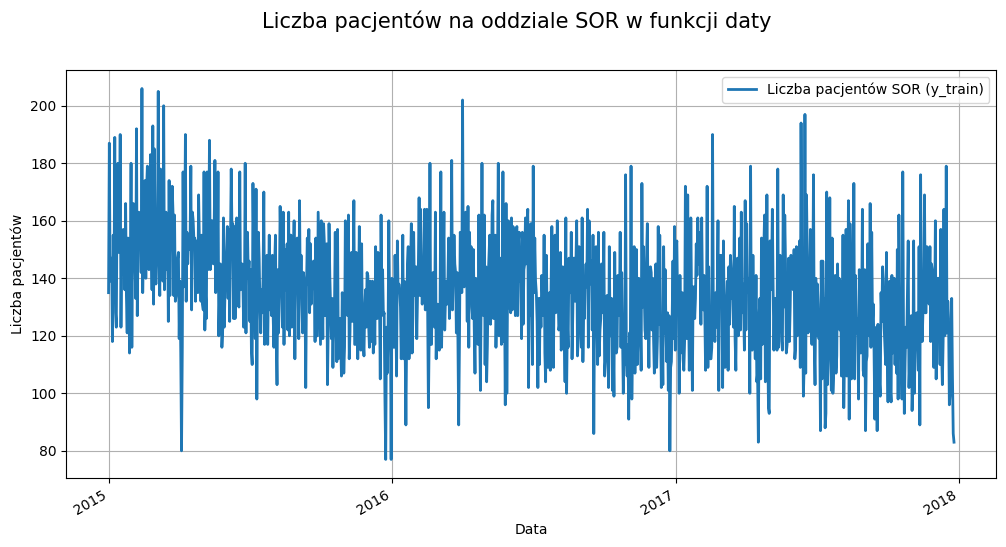

In [13]:
y_values = dfsor['y_train'].dropna()
dates = dfsor['date'][y_values.index]

date_locator = mdates.YearLocator(1)
date_formatter = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(dates, y_values, lw=2, label="Liczba pacjentów SOR (y_train)")
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylabel("Liczba pacjentów")
ax.set_xlabel("Data")
ax.legend()
ax.grid(True)


fig.suptitle("Liczba pacjentów na oddziale SOR w funkcji daty", fontsize=15)
fig.autofmt_xdate()
#plt.show()

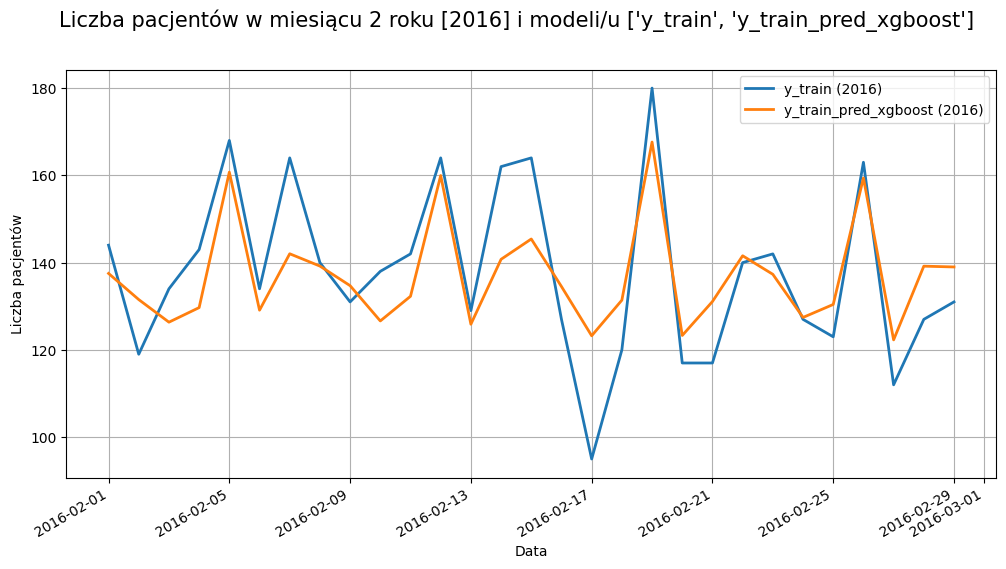

In [14]:
def plotMonthCounts(month,years,columns):
    filtered_data = dfsor[dfsor['date'].dt.month==month]
    filtered_data = filtered_data[filtered_data['date'].dt.year.isin(years)]
    fig, ax = plt.subplots(figsize=(12, 6))
    for column in columns:
        for year in years:
            data_for_year = filtered_data[filtered_data['date'].dt.year == year]
            ax.plot(data_for_year['date'], data_for_year[column], lw=2, label=f"{column} ({year})")
    ax.set_xlabel("Data")
    ax.set_ylabel("Liczba pacjentów")
    ax.legend()
    ax.grid(True)
    fig.suptitle(f"Liczba pacjentów w miesiącu {month} roku {years} i modeli/u {columns}", fontsize=15)
    fig.autofmt_xdate()
    plt.show()
plotMonthCounts(month=2, years=[2016], columns=["y_train", "y_train_pred_xgboost"])
